In [29]:
from tqdm import tqdm
import pandas as pd
import Classifier as cls
pd.set_option('display.float_format', '{:.4f}'.format)
from sklearn.metrics import accuracy_score

In [27]:
from tqdm import tqdm
import pandas as pd
import Classifier as cls
pd.set_option('display.float_format', '{:.4f}'.format)

names_lst = ['삼성전자', 'SK하이닉스', 'LG화학', '카카오', 'NAVER', '현대차']
days_lst = [5, 20, 60, 120]
# names_lst = ['삼성전자']
# days_lst = [20]
alpha_lst = [0.2, 0.4, 0.6, 0.8]

stock_code = pd.read_csv('./KOSPI_200.csv', dtype={'종목코드': str, '종목명': str})[['종목명', '종목코드']]
result_df = pd.DataFrame(columns=['NAME', 'DAY', 'ALPHA', 'XGB_ACC', 'RF_ACC', 'ACC'])

for name in tqdm(names_lst):
    print(f'Start {name} Modeling!!')
    data, code = cls.load_stocks_data(f'{name}', stock_code)

    for day in days_lst:
        stocks = cls.Stocks(data)
        stocks.preprocessing()
        sign_data = stocks.stocksign(stocks.data, day)
        
        for alpha in alpha_lst:
            xgb_acc, rf_acc, acc = stocks.predicts(sign_data, code, day, alpha)
            
            result_df = result_df.append({'NAME':name,
                                          'DAY':day,
                                          'ALPHA':alpha,
                                          'XGB_ACC':xgb_acc,
                                          'RF_ACC':rf_acc,
                                          'ACC':acc}, ignore_index=True)

print('Finish!!!!!')

  0%|          | 0/6 [00:00<?, ?it/s]

Start 삼성전자 Modeling!!
TODAY: 2021-08-22
(6000, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 17%|█▋        | 1/6 [00:06<00:34,  6.83s/it]

Start SK하이닉스 Modeling!!
TODAY: 2021-08-22
(6000, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 33%|███▎      | 2/6 [00:18<00:32,  8.21s/it]

Start LG화학 Modeling!!
TODAY: 2021-08-22
(5026, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 50%|█████     | 3/6 [00:53<00:49, 16.42s/it]

Start 카카오 Modeling!!
TODAY: 2021-08-22
(5377, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 67%|██████▋   | 4/6 [01:13<00:34, 17.27s/it]

Start NAVER Modeling!!
TODAY: 2021-08-22
(4655, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 83%|████████▎ | 5/6 [01:19<00:13, 13.89s/it]

Start 현대차 Modeling!!
TODAY: 2021-08-22
(6000, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


100%|██████████| 6/6 [01:25<00:00, 14.18s/it]

Finish!!!!!


In [78]:
df = pd.DataFrame(columns=['Model', 'Accuracy'])

In [79]:
df = df.append({'Model':'XGBoost',
                'Accuracy': result_df[result_df['ALPHA'] == 0.2]['XGB_ACC'].mean()}, ignore_index=True)

In [80]:
df = df.append({'Model':'RandomForest',
                'Accuracy': result_df[result_df['ALPHA'] == 0.2]['RF_ACC'].mean()}, ignore_index=True)

In [81]:
df = df.append({'Model':'ALPHA 0.2',
                'Accuracy': result_df[result_df['ALPHA'] == 0.2]['ACC'].mean()}, ignore_index=True)

df = df.append({'Model':'ALPHA 0.4',
                'Accuracy': result_df[result_df['ALPHA'] == 0.4]['ACC'].mean()}, ignore_index=True)

df = df.append({'Model':'ALPHA 0.6',
                'Accuracy': result_df[result_df['ALPHA'] == 0.6]['ACC'].mean()}, ignore_index=True)

df = df.append({'Model':'ALPHA 0.8',
                'Accuracy': result_df[result_df['ALPHA'] == 0.8]['ACC'].mean()}, ignore_index=True)

In [82]:
df.set_index('Model')

Accuracy
Model                 
XGBoost         0.7312
RandomForest    0.7015
ALPHA 0.2       0.7318
ALPHA 0.4       0.7277
ALPHA 0.6       0.7227
ALPHA 0.8       0.7143

In [67]:
result_df[result_df['ALPHA'] == 0.4]['XGB_ACC'].mean()

0.731214786236765

In [19]:
result_df[result_df['ALPHA'] == 0.2]['ACC'].mean()

0.7317531562894243

In [ ]:
result

In [7]:
result_df.to_csv('ClassificationAccuracy.csv', index=False)

In [36]:
result_df.groupby(['ALPHA']).mean()[['ACC']]

ACC
ALPHA        
0.2000 0.7318
0.4000 0.7277
0.6000 0.7227
0.8000 0.7143

In [57]:
result_df[(result_df['ALPHA'] == 0.2) & (result_df['NAME'] == '현대차')].groupby(['NAME', 'DAY']).mean().drop('ALPHA', axis=1)

XGB_ACC  RF_ACC    ACC
NAME DAY                        
현대차  5     0.6395  0.6939 0.6633
     20    0.7782  0.7577 0.7782
     60    0.8488  0.7491 0.8419
     120   0.7639  0.7847 0.7674

In [111]:
from datetime import timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
def accuracy(data, day):
    data['shift_Close'] = data['Close'].shift(-day)
    data['shift_ma20'] = data['ma20'].shift(-day)
    
    data['Close_target'] = (data['shift_Close'] - data['Close']).apply(lambda x: 1 if x > 0 else 0)
    data['ma20_target'] = (data['shift_ma20'] - data['ma20']).apply(lambda x: 1 if x > 0 else 0)
    
    acc = accuracy_score(data['Close_target'], data['ma20_target'])
    
    return acc

In [32]:
stock_code = pd.read_csv('./KOSPI_200.csv', dtype={'종목코드': str, '종목명': str})[['종목명', '종목코드']]
data, code = cls.load_stocks_data('삼성전자', stock_code)

stocks = cls.Stocks(data)
stocks.preprocessing()
data = stocks.stocksign(stocks.data, 20)
samsung = stocks.data
samsung_acc = accuracy(samsung)

TODAY: 2021-07-08
(5969, 6)
Preprocessing Done!!
StockSign Done!!


In [33]:
stock_code = pd.read_csv('./KOSPI_200.csv', dtype={'종목코드': str, '종목명': str})[['종목명', '종목코드']]
data, code = cls.load_stocks_data('카카오', stock_code)

stocks = cls.Stocks(data)
stocks.preprocessing()
data = stocks.stocksign(stocks.data, 20)
kakao = stocks.data
kakao_acc = accuracy(kakao)

TODAY: 2021-07-08
(5347, 6)
Preprocessing Done!!
StockSign Done!!


In [34]:
stock_code = pd.read_csv('./KOSPI_200.csv', dtype={'종목코드': str, '종목명': str})[['종목명', '종목코드']]
data, code = cls.load_stocks_data('LG화학', stock_code)

stocks = cls.Stocks(data)
stocks.preprocessing()
data = stocks.stocksign(stocks.data, 20)
lg = stocks.data
lg_acc = accuracy(lg)

TODAY: 2021-07-08
(4996, 6)
Preprocessing Done!!
StockSign Done!!


In [35]:
stock_code = pd.read_csv('./KOSPI_200.csv', dtype={'종목코드': str, '종목명': str})[['종목명', '종목코드']]
data, code = cls.load_stocks_data('SK하이닉스', stock_code)

stocks = cls.Stocks(data)
stocks.preprocessing()
data = stocks.stocksign(stocks.data, 20)
skhynix = stocks.data
skhynix_acc = accuracy(skhynix)

TODAY: 2021-07-08
(5969, 6)
Preprocessing Done!!
StockSign Done!!


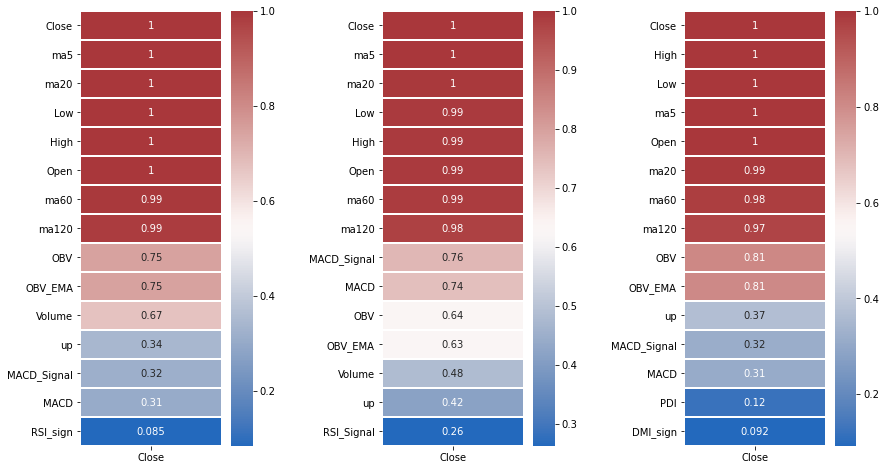

In [195]:
fig, axs = plt.subplots(figsize=(14, 8), ncols=3)
sns.heatmap(samsung.corr()[['Close']].sort_values(by='Close', ascending=False)[:15], cmap='vlag', linewidth=1.5, annot=True, ax=axs[0])
sns.heatmap(kakao.corr()[['Close']].sort_values(by='Close', ascending=False)[:15], cmap='vlag', linewidth=1.5, annot=True, ax=axs[1])
sns.heatmap(lg.corr()[['Close']].sort_values(by='Close', ascending=False)[:15], cmap='vlag', linewidth=1.5, annot=True, ax=axs[2])

plt.subplots_adjust(wspace=0.7)
plt.show()

In [ ]:
def accuracy(data, day):
    data['shift_Close'] = data['Close'].shift(-day)
    data['shift_ma20'] = data['ma20'].shift(-day)
    
    data['Close_target'] = (data['shift_Close'] - data['Close']).apply(lambda x: 1 if x > 0 else 0)
    data['ma20_target'] = (data['shift_ma20'] - data['ma20']).apply(lambda x: 1 if x > 0 else 0)
    
    acc = accuracy_score(data['Close_target'], data['ma20_target'])
    
    return acc

In [45]:
names_lst = ['삼성전자', 'SK하이닉스', 'LG화학', '카카오', 'NAVER', '현대차']
days_lst = [5, 20, 60, 120]

stock_code = pd.read_csv('./KOSPI_200.csv', dtype={'종목코드': str, '종목명': str})[['종목명', '종목코드']]
acc_df = pd.DataFrame(columns=['Name', 'MA5_Accuracy', 'MA20_Accuracy', 'MA60_Accuracy', 'MA120_Accuracy'])

for name in tqdm(names_lst):
    print(f'Start {name} Modeling!!')
    data, code = cls.load_stocks_data(f'{name}', stock_code)
    acc_lst = []
    
    for day in days_lst:
        stocks = cls.Stocks(data)
        stocks.preprocessing()
        data = stocks.stocksign(stocks.data, day)
        
        acc = accuracy(stocks.data, day)
        acc_lst.append(acc)
    
    acc_df = acc_df.append({'Name':name,
                            'MA5_Accuracy':acc_lst[0],
                            'MA20_Accuracy':acc_lst[1],
                            'MA60_Accuracy':acc_lst[2],
                            'MA120_Accuracy':acc_lst[3]}, ignore_index=True)

  0%|          | 0/6 [00:00<?, ?it/s]

Start 삼성전자 Modeling!!
TODAY: 2021-07-08
(5969, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 17%|█▋        | 1/6 [00:02<00:13,  2.61s/it]

Preprocessing Done!!
StockSign Done!!
Start SK하이닉스 Modeling!!
TODAY: 2021-07-08
(5969, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 33%|███▎      | 2/6 [00:05<00:10,  2.60s/it]

Preprocessing Done!!
StockSign Done!!
Start LG화학 Modeling!!
TODAY: 2021-07-08
(4996, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 50%|█████     | 3/6 [00:07<00:07,  2.52s/it]

Preprocessing Done!!
StockSign Done!!
Start 카카오 Modeling!!
TODAY: 2021-07-08
(5347, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 67%|██████▋   | 4/6 [00:09<00:04,  2.50s/it]

Preprocessing Done!!
StockSign Done!!
Start NAVER Modeling!!
TODAY: 2021-07-08
(4625, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


 83%|████████▎ | 5/6 [00:12<00:02,  2.43s/it]

Preprocessing Done!!
StockSign Done!!
Start 현대차 Modeling!!
TODAY: 2021-07-08
(5969, 6)
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!
Preprocessing Done!!
StockSign Done!!


100%|██████████| 6/6 [00:14<00:00,  2.47s/it]

Preprocessing Done!!
StockSign Done!!


In [47]:
acc_df

Name  MA5_Accuracy  MA20_Accuracy  MA60_Accuracy  MA120_Accuracy
0    삼성전자        0.6063         0.7279         0.8783          0.8907
1  SK하이닉스        0.6157         0.7316         0.8659          0.9008
2    LG화학        0.5944         0.7240         0.8623          0.9117
3     카카오        0.6019         0.7156         0.8846          0.9300
4   NAVER        0.5898         0.7432         0.8555          0.9094
5     현대차        0.5899         0.7228         0.8518          0.8970